In \[1\]:

    # This Python 3 environment comes with many helpful analytics libraries installed
    # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
    # For example, here's several helpful packages to load

    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Input data files are available in the read-only "../input/" directory
    # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
    # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

    /kaggle/input/most-selling-pc-games/Games.csv

In \[2\]:

    #Import Libraries
    import pandas as pd 
    import seaborn as sns 
    import matplotlib.pyplot as plt 
    import warnings
    warnings.filterwarnings('ignore')

In \[3\]:

    df = pd.read_csv('/kaggle/input/most-selling-pc-games/Games.csv')
    df.head()

Out\[3\]:

|     | Name                          | Sales | Series    | Release | Genre               | Developer              | Publisher              |
|-----|-------------------------------|-------|-----------|---------|---------------------|------------------------|------------------------|
| 0   | PlayerUnknown's Battlegrounds | 42.0  | NaN       | Dec-17  | Battle royale       | PUBG Studios           | Krafton                |
| 1   | Minecraft                     | 33.0  | Minecraft | Nov-11  | Sandbox, survival   | Mojang Studios         | Mojang Studios         |
| 2   | Diablo III                    | 20.0  | Diablo    | May-12  | Action role-playing | Blizzard Entertainment | Blizzard Entertainment |
| 3   | Garry's Mod                   | 20.0  | NaN       | Nov-06  | Sandbox             | Facepunch Studios      | Valve                  |
| 4   | Terraria                      | 17.2  | NaN       | May-11  | Action-adventure    | Re-Logic               | Re-Logic               |

In \[4\]:

    # Change Sales column name to Sales (Millions)
    df_copy = df.copy()
    df_copy.rename(columns={'Sales':'Sales (Millions)'}, inplace=True)
    df_copy.head()

Out\[4\]:

|     | Name                          | Sales (Millions) | Series    | Release | Genre               | Developer              | Publisher              |
|-----|-------------------------------|------------------|-----------|---------|---------------------|------------------------|------------------------|
| 0   | PlayerUnknown's Battlegrounds | 42.0             | NaN       | Dec-17  | Battle royale       | PUBG Studios           | Krafton                |
| 1   | Minecraft                     | 33.0             | Minecraft | Nov-11  | Sandbox, survival   | Mojang Studios         | Mojang Studios         |
| 2   | Diablo III                    | 20.0             | Diablo    | May-12  | Action role-playing | Blizzard Entertainment | Blizzard Entertainment |
| 3   | Garry's Mod                   | 20.0             | NaN       | Nov-06  | Sandbox             | Facepunch Studios      | Valve                  |
| 4   | Terraria                      | 17.2             | NaN       | May-11  | Action-adventure    | Re-Logic               | Re-Logic               |

In \[5\]:

    df_copy.tail()

Out\[5\]:

|     | Name                                 | Sales (Millions) | Series         | Release | Genre                   | Developer            | Publisher                  |
|-----|--------------------------------------|------------------|----------------|---------|-------------------------|----------------------|----------------------------|
| 170 | Vietcong                             | 1.0              | Vietcong       | Mar-03  | Tactical shooter        | Pterodon             | Gathering of Developers    |
| 171 | Warhammer Online: Age of Reckoning   | 1.0              | Warhammer      | Sep-08  | MMORPG                  | Mythic Entertainment | Electronic Arts            |
| 172 | Who Wants to Be a Millionaire?       | 1.0              | NaN            | Nov-99  | Trivia game             | Jellyvision          | Disney Interactive Studios |
| 173 | Wing Commander 3: Heart of the Tiger | 1.0              | Wing Commander | Dec-94  | Space combat simulation | Origin Systems       | Electronic Arts            |
| 174 | Zoo Tycoon                           | 1.0              | Zoo Tycoon     | Oct-01  | Business simulation     | Microsoft            | Blue Fang Games            |

In \[6\]:

    # Display number of rows and columns
    print('The dataset has {} rows and {} columns.'.format(df_copy.shape[0], df_copy.shape[1]))

    The dataset has 175 rows and 7 columns.

In \[7\]:

    # Get statistical overview of data
    df_copy.describe()

Out\[7\]:

|       | Sales (Millions) |
|-------|------------------|
| count | 175.000000       |
| mean  | 3.141143         |
| std   | 4.960513         |
| min   | 1.000000         |
| 25%   | 1.000000         |
| 50%   | 1.500000         |
| 75%   | 3.000000         |
| max   | 42.000000        |

In \[8\]:

    df_copy.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 175 entries, 0 to 174
    Data columns (total 7 columns):
     #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
     0   Name              175 non-null    object 
     1   Sales (Millions)  175 non-null    float64
     2   Series            139 non-null    object 
     3   Release           175 non-null    object 
     4   Genre             175 non-null    object 
     5   Developer         175 non-null    object 
     6   Publisher         175 non-null    object 
    dtypes: float64(1), object(6)
    memory usage: 9.7+ KB

###### The Series column has missing values.<a href="#The-Series-column-has-missing-values." class="anchor-link">¶</a>

In \[9\]:

    df_copy.isnull().sum()

Out\[9\]:

    Name                 0
    Sales (Millions)     0
    Series              36
    Release              0
    Genre                0
    Developer            0
    Publisher            0
    dtype: int64

In \[10\]:

    # Percentage of missing values 
    per_missing = round((df_copy.isnull().sum() / len(df_copy)) *100, 2)
    per_missing

Out\[10\]:

    Name                 0.00
    Sales (Millions)     0.00
    Series              20.57
    Release              0.00
    Genre                0.00
    Developer            0.00
    Publisher            0.00
    dtype: float64

In \[11\]:

    # Drop rows with missing values
    df_copy.dropna(inplace=True)
    df_copy.isnull().any()

Out\[11\]:

    Name                False
    Sales (Millions)    False
    Series              False
    Release             False
    Genre               False
    Developer           False
    Publisher           False
    dtype: bool

###### 20.5% of the data was dropped.<a href="#20.5%25-of-the-data-was-dropped." class="anchor-link">¶</a>

### 1. Which genre is the most popular ?<a href="#1.-Which-genre-is-the-most-popular-?" class="anchor-link">¶</a>

In \[12\]:

    df_copy.columns

Out\[12\]:

    Index(['Name', 'Sales (Millions)', 'Series', 'Release', 'Genre', 'Developer',
           'Publisher'],
          dtype='object')

In \[13\]:

    df_copy['Genre'].value_counts().head()

Out\[13\]:

    Real-time strategy      23
    First-person shooter    18
    Action role-playing     11
    Role-playing game        7
    MMORPG                   6
    Name: Genre, dtype: int64

In \[14\]:

    # Visualize most popular gaming genre
    plt.figure(figsize = (10,7))
    df_copy.Genre.value_counts().head().sort_values().plot(kind = 'barh', color = list('rgbkymc'))

Out\[14\]:

    <AxesSubplot:>

<img src="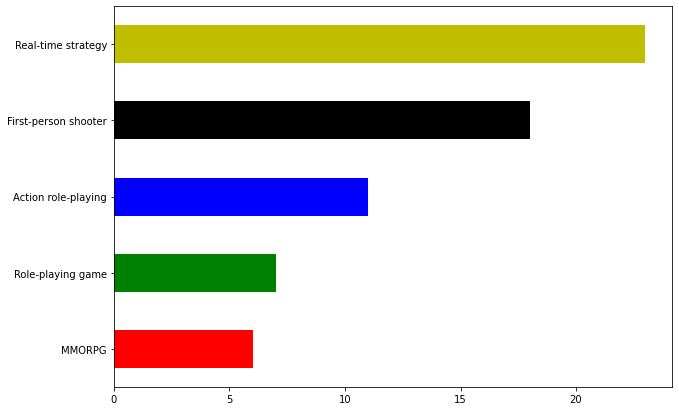%0A" class="jp-needs-light-background" />

### 2. Which publisher published most of the games ?<a href="#2.-Which-publisher-published-most-of-the-games-?" class="anchor-link">¶</a>

In \[15\]:

    df_copy['Publisher'].value_counts().head(1)

Out\[15\]:

    Electronic Arts    19
    Name: Publisher, dtype: int64

In \[16\]:

    plt.figure(figsize = (15,7))
    df_copy.Publisher.value_counts().iloc[:5].plot(kind='pie', ylabel='')
    plt.title("Top 5 Game Publishers", fontsize=(20))
    plt.show()

![](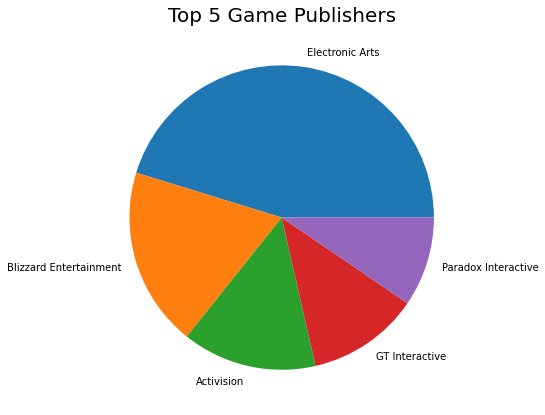%0A)

### 3. Which developer developed most of the games ?<a href="#3.-Which-developer-developed-most-of-the-games-?" class="anchor-link">¶</a>

In \[17\]:

    plt.figure(figsize = (15,7))
    df_copy.Developer.value_counts().iloc[:10].plot(kind='bar', color=('lightblue'))
    plt.title("Top 10 Game Developers", fontsize=(20))
    plt.ylabel("Number Of Games Developed", fontsize=(15))
    plt.xlabel("Developers", fontsize=(15))
    plt.xticks(rotation=30)
    plt.show()

<img src="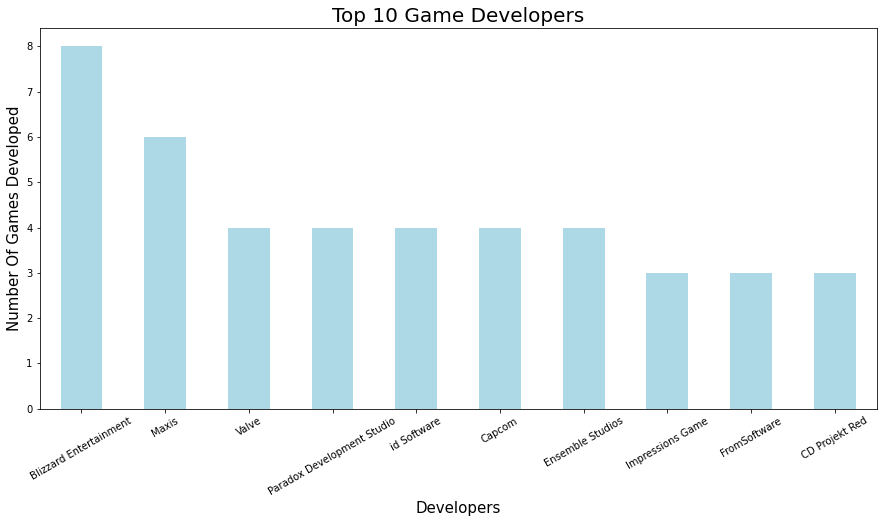%0A" class="jp-needs-light-background" />

### 4. Which series is the most popular ?<a href="#4.-Which-series-is-the-most-popular-?" class="anchor-link">¶</a>

In \[18\]:

    df_copy['Series'].value_counts().head(1)

Out\[18\]:

    Command & Conquer    5
    Name: Series, dtype: int64

###### Command & Conquer is the most popular series.<a href="#Command-&amp;-Conquer-is-the-most-popular-series." class="anchor-link">¶</a>

In \[19\]:

    # Convert Release date to pandas Datetime
    df_copy['Datetime'] = pd.to_datetime(df_copy.Release,format='%b-%y')
    df_copy.head()

Out\[19\]:

|     | Name                     | Sales (Millions) | Series      | Release | Genre                | Developer              | Publisher              | Datetime   |
|-----|--------------------------|------------------|-------------|---------|----------------------|------------------------|------------------------|------------|
| 1   | Minecraft                | 33.0             | Minecraft   | Nov-11  | Sandbox, survival    | Mojang Studios         | Mojang Studios         | 2011-11-01 |
| 2   | Diablo III               | 20.0             | Diablo      | May-12  | Action role-playing  | Blizzard Entertainment | Blizzard Entertainment | 2012-05-01 |
| 5   | World of Warcraft        | 14.0             | Warcraft    | Nov-04  | MMORPG               | Blizzard Entertainment | Blizzard Entertainment | 2004-11-01 |
| 6   | Half-Life 2              | 12.0             | Half-Life   | Nov-04  | First-person shooter | Valve                  | Valve (digital)        | 2004-11-01 |
| 7   | The Witcher 3: Wild Hunt | 12.0             | The Witcher | May-15  | Action role-playing  | CD Projekt Red         | CD Projekt             | 2015-05-01 |

In \[20\]:

    df_copy['Year'] = df_copy['Datetime'].dt.year
    df_copy.head()

Out\[20\]:

|     | Name                     | Sales (Millions) | Series      | Release | Genre                | Developer              | Publisher              | Datetime   | Year |
|-----|--------------------------|------------------|-------------|---------|----------------------|------------------------|------------------------|------------|------|
| 1   | Minecraft                | 33.0             | Minecraft   | Nov-11  | Sandbox, survival    | Mojang Studios         | Mojang Studios         | 2011-11-01 | 2011 |
| 2   | Diablo III               | 20.0             | Diablo      | May-12  | Action role-playing  | Blizzard Entertainment | Blizzard Entertainment | 2012-05-01 | 2012 |
| 5   | World of Warcraft        | 14.0             | Warcraft    | Nov-04  | MMORPG               | Blizzard Entertainment | Blizzard Entertainment | 2004-11-01 | 2004 |
| 6   | Half-Life 2              | 12.0             | Half-Life   | Nov-04  | First-person shooter | Valve                  | Valve (digital)        | 2004-11-01 | 2004 |
| 7   | The Witcher 3: Wild Hunt | 12.0             | The Witcher | May-15  | Action role-playing  | CD Projekt Red         | CD Projekt             | 2015-05-01 | 2015 |

In \[21\]:

    plt.figure(figsize=(15,7))
    sns.countplot('Year', data=df_copy)
    plt.xlabel('Year', fontsize=(15))
    plt.ylabel('Count', fontsize=(15))
    plt.xticks(rotation=10)
    plt.show()

<img src="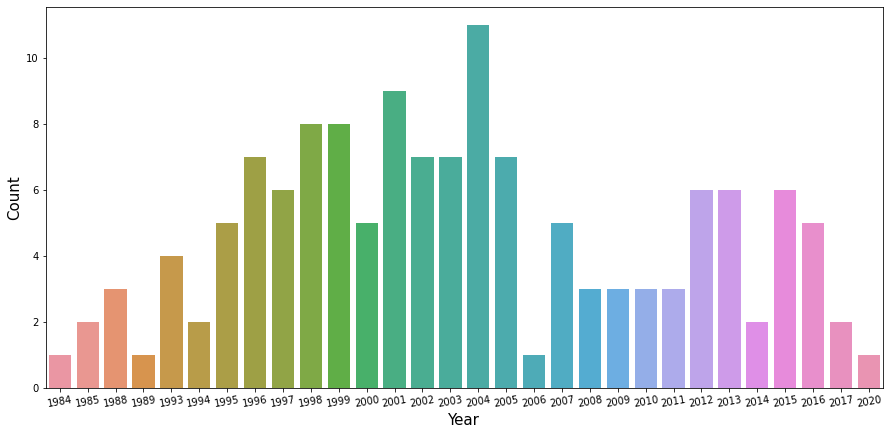%0A" class="jp-needs-light-background" />

In \[ \]:

     

In \[ \]:

     

In \[ \]: